In [1]:
# Import the random module.
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import requests
import requests

# Importing API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Importing Stats library
from scipy.stats import linregress

# Import gmaps
import gmaps

# Import the API key.
from config import g_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

paracatu br
imeni poliny osipenko ru
port elizabeth za
tungkang tw
pevek ru
taolanaro mg
rikitea pf
iisalmi fi
mys shmidta ru
caravelas br
taolanaro mg
butaritari ki
salaga gh
albany au
korla cn
puerto ayora ec
wasilla us
provideniya ru
gat ly
kapaa us
paamiut gl
katsuura jp
faanui pf
grand river south east mu
rikitea pf
auki sb
lolua tv
mangai cd
carnarvon au
mar del plata ar
arraial do cabo br
viedma ar
new norfolk au
ushuaia ar
yellowknife ca
namatanai pg
valparaiso cl
ushuaia ar
byron bay au
santa fe cu
castro cl
qaanaaq gl
guerrero negro mx
langarud ir
cabedelo br
abu zabad sd
albany au
barentsburg sj
rikitea pf
rikitea pf
lebu cl
jamestown sh
viedma ar
amderma ru
jiaxing cn
punta arenas cl
ushuaia ar
jamestown sh
pinega ru
wahiawa us
punta arenas cl
anchorage us
puerto ayora ec
odweyne so
hobart au
plettenberg bay za
yumen cn
jamestown sh
pendleton us
atuona pf
punta arenas cl
yulara au
zhuanghe cn
jamestown sh
kruisfontein za
geraldton ca
wangaratta au
pevek ru
mahebourg mu
chok

vama ro
cape town za
winchester us
illoqqortoormiut gl
nantucket us
bethel us
avarua ck
jumla np
atuona pf
tongchuan cn
bolungarvik is
santa maria us
punta arenas cl
mys shmidta ru
nouadhibou mr
hermanus za
illoqqortoormiut gl
dalvik is
mount gambier au
katsuura jp
avarua ck
tasiilaq gl
los llanos de aridane es
cherskiy ru
chernyshevskiy ru
nikolskoye ru
bur gabo so
gorodishche ru
sao pedro do sul br
taolanaro mg
umm lajj sa
new norfolk au
hermanus za
selenduma ru
bluff nz
hermanus za
ulladulla au
ponta do sol cv
esperance au
busselton au
luderitz na
arman ru
sonoita mx
east london za
rikitea pf
cidreira br
namatanai pg
nikolskoye ru
anadyr ru
omboue ga
dikson ru
busselton au
butaritari ki
rikitea pf
sinjar iq
alofi nu
sao joao da barra br
hilo us
pevek ru
taolanaro mg
yaan cn
belturbet ie
albany au
avarua ck
atuona pf
potgietersrus za
sulina ro
aksarka ru
washington us
ayia marina gr
thompson ca
bluff nz
victoria sc
new norfolk au
ushuaia ar
cercal pt
vaini to
nanortalik gl
port alfre

cape town za
vaini to
maltahohe na
yellowknife ca
dikson ru
pacific grove us
hambantota lk
avarua ck
grand river south east mu
taolanaro mg
lata sb
narsaq gl
avarua ck
bambous virieux mu
ushuaia ar
katsuura jp
vao nc
bredasdorp za
rikitea pf
albany au
boende cd
hermanus za
cape town za
port augusta au
wewak pg
ouahigouya bf
bambous virieux mu
lubumbashi cd
busselton au
marevo ru
matagami ca
atuona pf
abha sa
albany au
ushuaia ar
tuktoyaktuk ca
hermanus za
jinchengjiang cn
victoria sc
avarua ck
outram nz
hobart au
lazaro cardenas mx
ribeira grande pt
guerrero negro mx
taolanaro mg
zheleznodorozhnyy ru
dundalk ie
hamza uz
dunedin nz
dikson ru
bethel us
tiksi ru
derzhavinsk kz
ca mau vn
mitsamiouli km
cockburn harbour tc
lagoa pt
ledyard us
banjar id
jalu ly
puerto ayora ec
nikolskoye ru
tura ru
kavieng pg
mahebourg mu
inhambane mz
zaporizhzhya ua
mahebourg mu
bethel us
georgetown sh
caravelas br
ushuaia ar
lagunas pe
barentsburg sj
ushuaia ar
avarua ck
bosaso so
barentsburg sj
carnarvon 

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

648

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":43.05,"feels_like":38.82,"temp_min":40.57,"temp_max":45.23,"pressure":1012,"humidity":95},"visibility":358,"wind":{"speed":7,"deg":47,"gust":15.01},"clouds":{"all":100},"dt":1648166160,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1648118433,"sunset":1648162819},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 43.05,
  'feels_like': 38.82,
  'temp_min': 40.57,
  'temp_max': 45.23,
  'pressure': 1012,
  'humidity': 95},
 'visibility': 358,
 'wind': {'speed': 7, 'deg': 47, 'gust': 15.01},
 'clouds': {'all': 100},
 'dt': 1648166160,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648118433,
  'sunset': 1648162819},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 43.05,
  'feels_like': 38.82,
  'temp_min': 40.57,
  'temp_max': 45.23,
  'pressure': 1012,
  'humidity': 95},
 'visibility': 358,
 'wind': {'speed': 7, 'deg': 47, 'gust': 15.01},
 'clouds': {'all': 100},
 'dt': 1648166160,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648118433,
  'sunset': 1648162819},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1648118433,
 'sunset': 1648162819}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1648166160

In [22]:
boston_data["coord"]["lat"]

42.3584

In [23]:
boston_data["main"]["temp_max"]

45.23

In [24]:
# Displaying information from JSON
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 45.23 95 100 7


In [25]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 3, 24, 23, 56)

In [26]:
# Display time and date
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-24 23:56:00'

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paracatu
Processing Record 2 of Set 1 | imeni poliny osipenko
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | tungkang
City not found. Skipping...
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | iisalmi
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | caravelas
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | salaga
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | korla
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | wasilla
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | ka

Processing Record 36 of Set 4 | mehamn
Processing Record 37 of Set 4 | maraa
Processing Record 38 of Set 4 | ancud
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | drayton valley
Processing Record 42 of Set 4 | mahon
Processing Record 43 of Set 4 | emba
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | turukhansk
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | catamarca
Processing Record 50 of Set 4 | warqla
City not found. Skipping...
Processing Record 1 of Set 5 | sezana
Processing Record 2 of Set 5 | concordia
Processing Record 3 of Set 5 | doha
Processing Record 4 of Set 5 | roebourne
Processing Record 5 of Set 5 | kerrobert
Processing Record 6 of Set 5 | labe
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | bonthe
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 

Processing Record 27 of Set 8 | nantucket
Processing Record 28 of Set 8 | jumla
Processing Record 29 of Set 8 | tongchuan
Processing Record 30 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 8 | santa maria
Processing Record 32 of Set 8 | nouadhibou
Processing Record 33 of Set 8 | dalvik
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | chernyshevskiy
Processing Record 37 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 38 of Set 8 | sao pedro do sul
Processing Record 39 of Set 8 | selenduma
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | arman
Processing Record 43 of Set 8 | sonoita
Processing Record 44 of Set 8 | sinjar
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | yaan
Processing Record 47 of Set 8 | belturbet
Processing Record 48 of Set 8 | potgietersrus
Cit

Processing Record 14 of Set 12 | didsbury
Processing Record 15 of Set 12 | neringa
Processing Record 16 of Set 12 | khash
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | faya
Processing Record 19 of Set 12 | shache
Processing Record 20 of Set 12 | haizhou
Processing Record 21 of Set 12 | longyearbyen
Processing Record 22 of Set 12 | smidovich
Processing Record 23 of Set 12 | petrolina
Processing Record 24 of Set 12 | klyuchi
Processing Record 25 of Set 12 | frontino
Processing Record 26 of Set 12 | aanekoski
Processing Record 27 of Set 12 | rambha
Processing Record 28 of Set 12 | high prairie
Processing Record 29 of Set 12 | aguimes
Processing Record 30 of Set 12 | cayenne
Processing Record 31 of Set 12 | bolobo
Processing Record 32 of Set 12 | rawson
Processing Record 33 of Set 12 | kaeo
Processing Record 34 of Set 12 | makakilo city
Processing Record 35 of Set 12 | yanan
City not found. Skipping...
Processing Record 36 of Set 12 | flinders
Processing Recor

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paracatu,-17.2222,-46.8747,73.35,62,67,2.17,BR,2022-03-24 23:58:22
1,Imeni Poliny Osipenko,52.4201,136.4853,18.66,92,100,2.59,RU,2022-03-24 23:58:23
2,Port Elizabeth,-33.9180,25.5701,64.69,97,100,10.36,ZA,2022-03-24 23:58:23
3,Pevek,69.7008,170.3133,5.70,95,96,6.53,RU,2022-03-24 23:58:24
4,Rikitea,-23.1203,-134.9692,79.99,71,100,13.73,PF,2022-03-24 23:58:24
5,Iisalmi,63.5592,27.1907,26.92,88,53,8.21,FI,2022-03-24 23:58:24
6,Caravelas,-17.7125,-39.2481,76.01,89,12,4.54,BR,2022-03-24 23:58:25
7,Butaritari,3.0707,172.7902,80.58,71,98,13.31,KI,2022-03-24 23:58:25
8,Salaga,8.5508,-0.5188,85.32,55,59,7.43,GH,2022-03-24 23:58:26
9,Albany,42.6001,-73.9662,42.62,84,100,1.01,US,2022-03-24 23:56:26


In [29]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paracatu,BR,2022-03-24 23:58:22,-17.2222,-46.8747,73.35,62,67,2.17
1,Imeni Poliny Osipenko,RU,2022-03-24 23:58:23,52.4201,136.4853,18.66,92,100,2.59
2,Port Elizabeth,ZA,2022-03-24 23:58:23,-33.9180,25.5701,64.69,97,100,10.36
3,Pevek,RU,2022-03-24 23:58:24,69.7008,170.3133,5.70,95,96,6.53
4,Rikitea,PF,2022-03-24 23:58:24,-23.1203,-134.9692,79.99,71,100,13.73
...,...,...,...,...,...,...,...,...,...
594,Pemba,MZ,2022-03-25 00:01:56,-12.9740,40.5178,78.67,81,82,2.77
595,Marzuq,YE,2022-03-24 23:59:49,14.4000,46.4667,68.67,66,6,5.08
596,Porosozero,RU,2022-03-25 00:01:56,62.7191,32.7270,18.73,90,17,4.97
597,Isangel,VU,2022-03-25 00:01:27,-19.5500,169.2667,82.35,71,38,13.60


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Get today's date in seconds.
today = time.time()
today

1648166518.1329129

In [33]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/24/22'

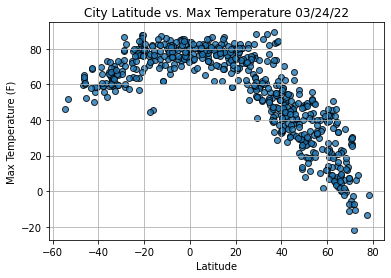

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

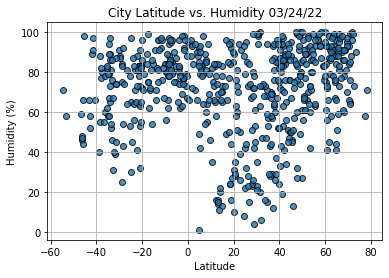

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

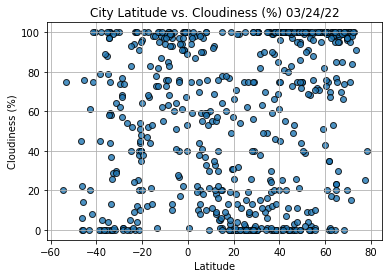

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

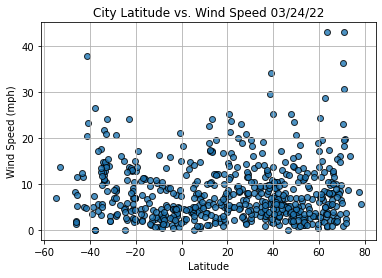

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [40]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

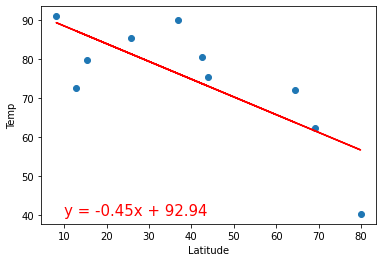

In [41]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
#Displaying output
index13 = city_data_df.loc[13]
index13

City                  Provideniya
Country                        RU
Date          2022-03-24 23:58:27
Lat                       64.3833
Lng                        -173.3
Max Temp                    14.36
Humidity                       67
Cloudiness                      0
Wind Speed                  13.42
Name: 13, dtype: object

In [44]:
# Displaying values of a row
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
594    False
595     True
596     True
597    False
598     True
Name: Lat, Length: 599, dtype: bool

In [45]:
# Displaying values of a row
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Imeni Poliny Osipenko,RU,2022-03-24 23:58:23,52.4201,136.4853,18.66,92,100,2.59
3,Pevek,RU,2022-03-24 23:58:24,69.7008,170.3133,5.70,95,96,6.53
5,Iisalmi,FI,2022-03-24 23:58:24,63.5592,27.1907,26.92,88,53,8.21
7,Butaritari,KI,2022-03-24 23:58:25,3.0707,172.7902,80.58,71,98,13.31
8,Salaga,GH,2022-03-24 23:58:26,8.5508,-0.5188,85.32,55,59,7.43
...,...,...,...,...,...,...,...,...,...
591,San Andres,CO,2022-03-25 00:01:55,12.5847,-81.7006,80.51,74,57,17.34
592,Salym,RU,2022-03-25 00:01:55,60.0625,71.4789,22.89,95,100,13.65
595,Marzuq,YE,2022-03-24 23:59:49,14.4000,46.4667,68.67,66,6,5.08
596,Porosozero,RU,2022-03-25 00:01:56,62.7191,32.7270,18.73,90,17,4.97


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

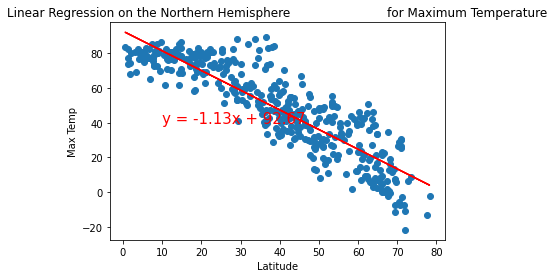

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

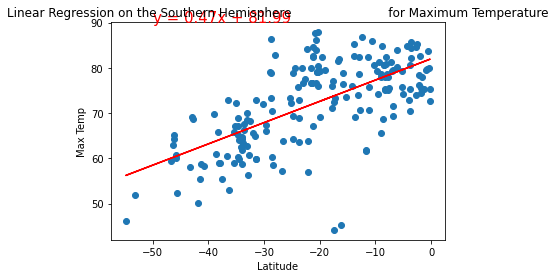

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

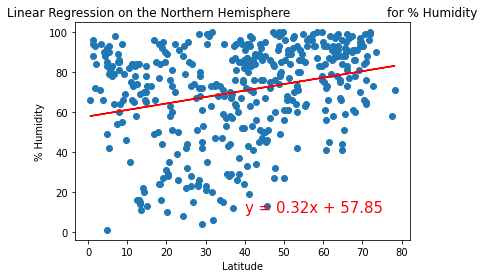

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

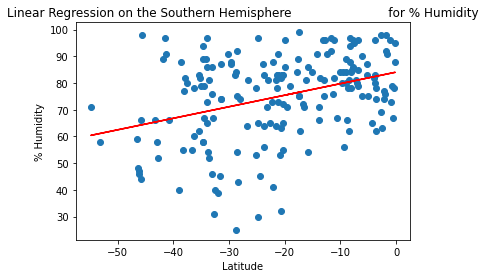

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

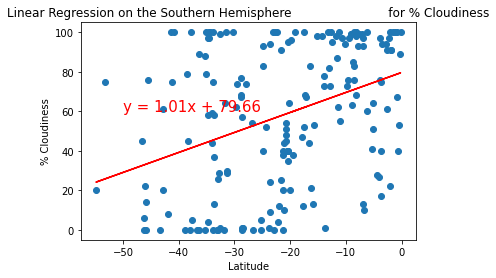

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

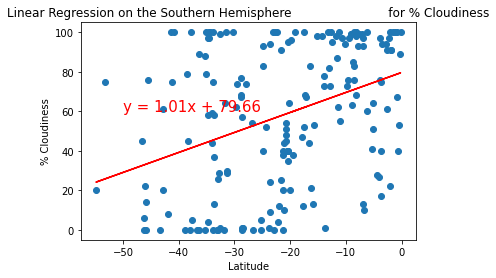

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

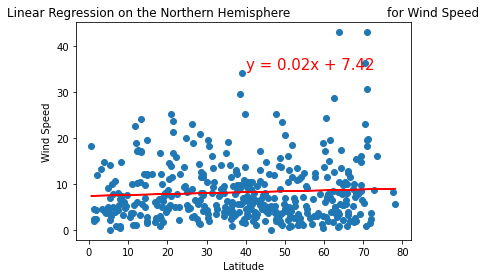

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

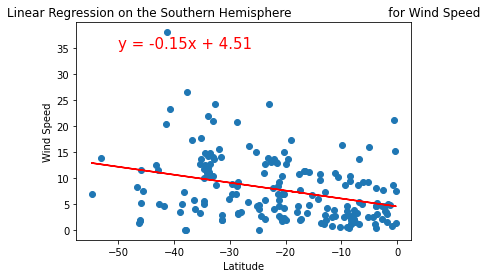

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))